<a href="https://colab.research.google.com/github/ShivenTripathi/CS786-Computational-Cognitive-Science/blob/main/Assignments/190816_CS786_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS786
## Assignment 2
## Name: Shiven Tripathi
## Roll No.: 190816

### Code is also available at:

[190816_CS786_Assn_2.ipynb](https://colab.research.google.com/drive/1Gew8AIvvw5YgXyP-Ynpa0iHCtHiYU8g0?usp=sharing)

(Google Colab Notebook)

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# **Q1. (40 points)** 
Without using any third-party libraries or toolboxes, write code to \\
(a) take any three variable Boolean function as input \\
(b) generate training examples for this Boolean function \\
(c) train a neural network to learn this Boolean function, and \\
(d) verify that the function has been learned, for five separate Boolean functions.  \\

In [ ]:
def generate_boolean_dataset(n_var=2):
  """
  Generated random boolean array, and corresponding inputs according to variable size
  """
  bin_values = []
  variables = np.zeros((2**n_var,n_var)).astype(int)
  for i in range(2**n_var):
    x = bin(i).replace("0b", "").zfill(n_var)
    for j in range(n_var):
      variables[i][j] = int(x[j])
  
  return variables,np.random.randint(0,2,size=(1,2**n_var)).T

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [ ]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0] 
    n_h = 4
    n_y = Y.shape[0] 
    return (n_x, n_h, n_y)

In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) 
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [ ]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
   
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
   
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [ ]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] 
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    
    
    cost = np.squeeze(cost)     
    assert(isinstance(cost, float))
    
    return cost

In [ ]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    
    W1 = parameters['W1']
    W2 = parameters['W2']
   
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [ ]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
   
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [ ]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    for i in range(0, num_iterations):
        
        A2, cache = forward_propagation(X, parameters)
       
        cost = compute_cost(A2, Y, parameters)
 
        grads = backward_propagation(parameters, cache, X, Y)
 
        parameters = update_parameters(parameters, grads)
       
        if print_cost and i % 10 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))

    return parameters

In [ ]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """

    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    
    return predictions

In [ ]:
def train_on_boolean(n_var=3,n_h=2,num_iterations=2*10**2,print_cost=True):
  X,Y= generate_boolean_dataset(n_var)
  X = X.T
  Y = Y.T
  parameters = nn_model(X, Y, n_h = n_h, num_iterations=num_iterations, print_cost=print_cost)
  predictions = predict(parameters, X)
  print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')
  return X,Y,parameters

In [ ]:
X,Y,params = train_on_boolean(n_h=3,num_iterations=2*10**3,print_cost=True)

Cost after iteration 0: 0.693058
Cost after iteration 10: 0.680288
Cost after iteration 20: 0.365008
Cost after iteration 30: 0.106396
Cost after iteration 40: 0.048588
Cost after iteration 50: 0.029448
Cost after iteration 60: 0.020591
Cost after iteration 70: 0.015632
Cost after iteration 80: 0.012507
Cost after iteration 90: 0.010375
Cost after iteration 100: 0.008836
Cost after iteration 110: 0.007678
Cost after iteration 120: 0.006776
Cost after iteration 130: 0.006057
Cost after iteration 140: 0.005470
Cost after iteration 150: 0.004982
Cost after iteration 160: 0.004571
Cost after iteration 170: 0.004221
Cost after iteration 180: 0.003918
Cost after iteration 190: 0.003655
Cost after iteration 200: 0.003423
Cost after iteration 210: 0.003219
Cost after iteration 220: 0.003036
Cost after iteration 230: 0.002872
Cost after iteration 240: 0.002725
Cost after iteration 250: 0.002591
Cost after iteration 260: 0.002470
Cost after iteration 270: 0.002359
Cost after iteration 280: 0.002

In [ ]:
print("Trained on Function:")
print("X  Y  Z  F(X,Y,Z)")
print(np.concatenate((X.T,Y.T),axis=-1))

Trained on Function:
X  Y  Z  F(X,Y,Z)
[[0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [0 1 1 0]
 [1 0 0 1]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 0]]


# **Q2. (40 points)** 
Without using any third-party libraries or toolboxes, write code to \\
(a) generate a random instance of the frozen lake scenario given two inputs - the size of the lake (N) 
assuming its square, and the number of holes (M). \\
(b) implement a Q-learning agent to find a path through the lake to the goal. Report the results of
the learning algorithm by plotting episode count on the x-axis and total reward received by the
agent within an episode on the y-axis \\
(c) identify how learning performance changes when you change the parameters α and λ in your
algorithm \\
(d) identify how learning performance changes with respect to changes in N and M

In [ ]:
class FrozenWorld:

  def __init__(self, N, M, start=0, goal=-1, winReward=1, loseReward=-0.5, stepReward=0):
    
    self.size = N
    self.nholes = M
    self.frozenLake = None
    self.start = start
    if goal is -1:
      self.goal = self.size**2 - 1
    else:
      self.goal = goal
    self.state = None
    self.actionSpace = {}
    self.rewardSpace = {}
    self.winReward = winReward
    self.loseReward = loseReward
    self.stepReward = stepReward
    self.over = False

  def isValid(self,move,initial):
    """
    Checks if a move is valid or not
    """
    if move > 0 and move < self.size**2: # >0 so that it does not come back to start
      if move is initial-1 and initial%self.size is 0:
        return False
      if move is initial+1 and initial%self.size is self.size-1:
        return False
      return True
    return False

  def initEnv(self):
    """
    Holes denoted by 0, Solid Ice by 1
    Inits Rewardspace
    """
    hole_index_1d = random.sample([i for i in range(self.size**2)],self.nholes)
    self.frozenLake = np.ones(self.size**2).astype(int)
    for i in hole_index_1d:
      if i!=self.start and i!=self.goal:
        self.frozenLake[i] = 0

    self.state = self.start

    for i in range(self.size**2):
      moves = []
      if self.isValid(i-self.size,i):
        moves.append(i-self.size)
      if self.isValid(i-1,i):
        moves.append(i-1)
      if self.isValid(i+1,i):
        moves.append(i+1)
      if self.isValid(i+self.size,i):
        moves.append(i+self.size)
      self.actionSpace[i] = moves  

    for i in range(self.size**2):
      if self.frozenLake[i] == 0:
        self.rewardSpace[i] = self.loseReward
      else: 
        self.rewardSpace[i] = self.stepReward
    self.rewardSpace[self.goal] = self.winReward
  
  def stateTransit(self, state2):
    """
    Checks for game over and returns reward after updating state
    """
    reward = self.rewardSpace[state2]
    if reward == self.loseReward or state2 == self.goal:
    # if state2 == self.goal:
      self.over = True
    prev_state = self.state
    self.state = state2
    return reward, prev_state

  def reset(self):
    self.state = self.start
    self.over = False

  def displayEnv(self):
    """
    """
    # plt.matshow(np.reshape(self.frozenLake,(self.size,self.size)))
    textMat = ['F' for i in range(self.size**2)]
    colorMat = np.copy(self.frozenLake)

    for i in range(self.size**2):
      if self.frozenLake[i] == 0:
        textMat[i] = 'H'
      
    textMat[self.start] = 'S'
    textMat[self.goal] = 'G'
    textMat[self.state] = 'current'
    colorMat[self.start] = -1
    colorMat[self.goal] = 2
    colorMat[self.state] = 5

    colorMat = np.reshape(colorMat, (self.size,self.size))
    textMat = np.reshape(textMat, (self.size,self.size))

    fig, ax = plt.subplots()
    ax.matshow(colorMat)
    for i in range(self.size):
      for j in range(self.size):
        c = textMat[j,i]
        ax.text(i, j, str(c), va='center', ha='center')


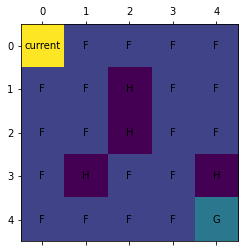

In [ ]:
x=FrozenWorld(5,4)
x.initEnv()
x.displayEnv()

In [ ]:
print(x.actionSpace)

{0: [1, 5], 1: [2, 6], 2: [1, 3, 7], 3: [2, 4, 8], 4: [3, 9], 5: [6, 10], 6: [1, 5, 7, 11], 7: [2, 6, 8, 12], 8: [3, 7, 9, 13], 9: [4, 8, 14], 10: [5, 11, 15], 11: [6, 10, 12, 16], 12: [7, 11, 13, 17], 13: [8, 12, 14, 18], 14: [9, 13, 19], 15: [10, 16, 20], 16: [11, 15, 17, 21], 17: [12, 16, 18, 22], 18: [13, 17, 19, 23], 19: [14, 18, 24], 20: [15, 21], 21: [16, 20, 22], 22: [17, 21, 23], 23: [18, 22, 24], 24: [19, 23]}


In [ ]:
print(x.rewardSpace)

{0: 0, 1: 0, 2: 0, 3: -0.5, 4: 0, 5: 0, 6: -0.5, 7: 0, 8: 0, 9: 0, 10: -0.5, 11: 0, 12: 0, 13: -0.5, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 1}


In [ ]:
class QAgent():
  def __init__(self, env, epsilon=0.8, gamma=0.9, lr=0.1):
    self.env = env
    self.epsilon = epsilon
    self.Q = {}
    for state in self.env.actionSpace:
      action_value = {}
      for move in self.env.actionSpace[state]:
        action_value[move] = 0.0
      self.Q[state] = action_value
    self.gamma = gamma
    self.lr = lr

  def chooseAction(self):
    """
    epsilon greedy action choice
    """
    if np.random.uniform(0,1) < self.epsilon:
      return random.choice(self.env.actionSpace[self.env.state])
    else:
      return max(self.Q[self.env.state], key=self.Q[self.env.state].get)

  def qLearn(self):
    """
    updates Q Values
    """
    state2 = self.chooseAction()
    reward, prev_state = self.env.stateTransit(state2)
    predict = self.Q[prev_state][state2]
    target = reward + self.gamma * max(self.Q[state2].values())
    self.Q[prev_state][state2] = predict + self.lr * (target - predict)
    return self.env.over, reward

  def greedyPlay(self, steps=20, display=True):
    """
    Used to test after Q Learning completed
    """
    self.env.reset()
    t=0
    while t<=steps:
      if self.env.state == self.env.goal:
        if display == True:
          self.env.displayEnv()
        break
      if display == True:
        self.env.displayEnv()
      self.env.state = max(self.Q[self.env.state], key=self.Q[self.env.state].get)
      t+=1
    self.env.reset()
    return t

In [ ]:
def frozenWorldSolver(world_size=5, nholes=10, n_episodes=10**3, avg_step=2000, epsilon_decay=True, epsilon=0.8, gamma=0.9, lr=0.1, silent=False):
  """
  Use silent if you do not want print and visualisation
  Use epsilon decay to reduce epsilon over episodes
  """
  x = FrozenWorld(world_size,nholes)
  x.initEnv()
  if silent is False:
    print("Environment Initialised")
  # x.displayEnv()
  agent = QAgent(x,epsilon=epsilon, gamma=gamma, lr=lr)
  total_reward=[]
  for episode in range(n_episodes//avg_step):
    x.reset()
    if epsilon_decay is True:
      agent.epsilon = agent.epsilon*(2-episode/n_episodes)/2
    episode_reward = 0
    for i in range(avg_step):
      t=0
      while t<10**3:
        t+=1
        done,reward = agent.qLearn()
        episode_reward += reward
        if done:
          break
    total_reward.append(episode_reward/avg_step)
  if silent is False:
    print("Q Table Calculated")
    print("Starting Greedy Play")
    tsteps  = agent.greedyPlay()
    print("Greedy Play Completed in: "+str(tsteps)+" steps")
    return total_reward,agent,tsteps
  else:
    return total_reward,agent

In [ ]:
N_EPISODES = 10**5
AVG_STEP = 2*10**3
N_HOLES = 8
WORLD_SIZE = 6
EPSILON=0.8
GAMMA=0.9
LR=0.1

Environment Initialised
Q Table Calculated
Starting Greedy Play
Greedy Play Completed in: 10 steps


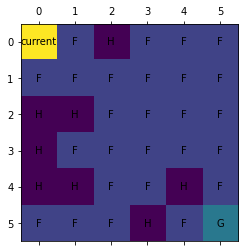

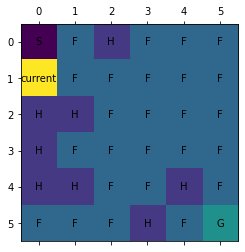

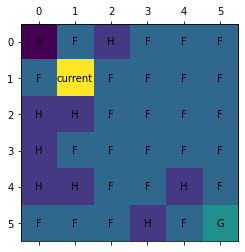

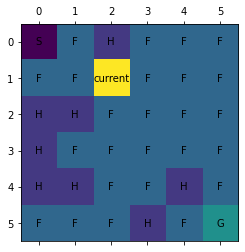

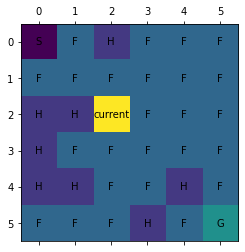

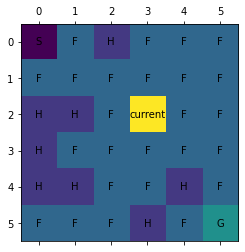

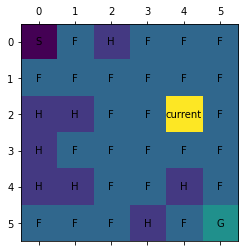

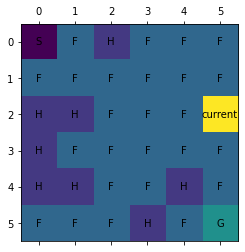

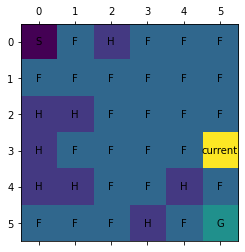

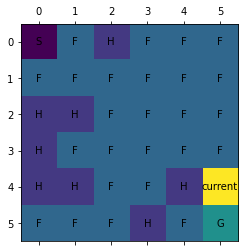

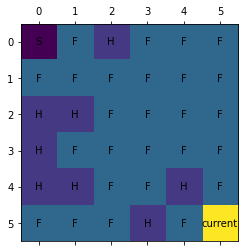

In [ ]:
total_reward,agent,tsteps = frozenWorldSolver(world_size=WORLD_SIZE, nholes=N_HOLES, n_episodes=N_EPISODES, avg_step=AVG_STEP, epsilon=EPSILON, gamma=GAMMA, lr=LR)

## Results on varying parameters

### Varying LR (alpha), rest constant

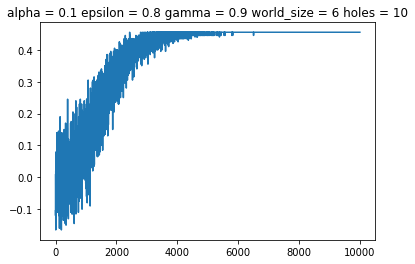

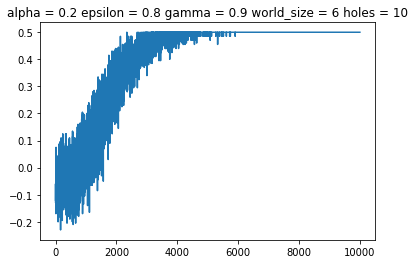

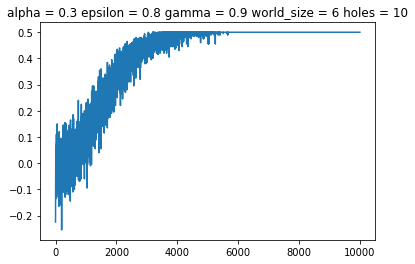

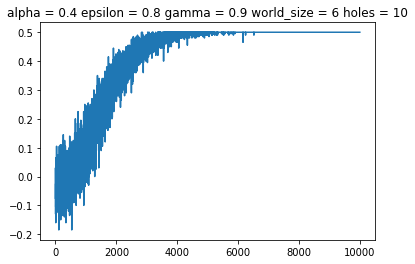

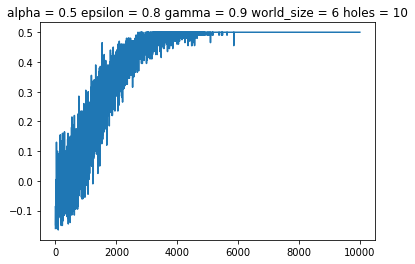

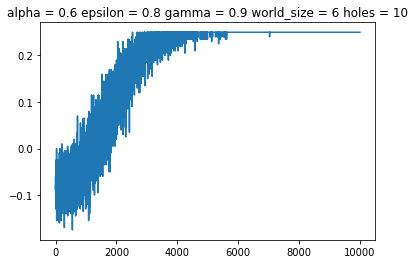

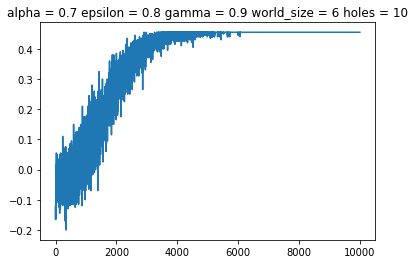

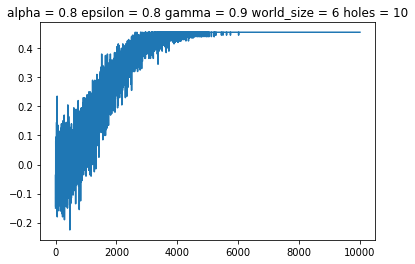

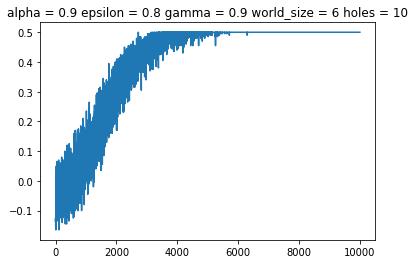

In [ ]:
N_EPISODES = 10**6
AVG_STEP = 10**2
N_HOLES = 10
WORLD_SIZE = 6
EPSILON=0.8
GAMMA=0.9
LR=0.1

for i in range(1,10):
  LR = i/10
  total_reward,agent = frozenWorldSolver(world_size=WORLD_SIZE, nholes=N_HOLES, n_episodes=N_EPISODES, avg_step=AVG_STEP, epsilon=EPSILON, gamma=GAMMA, lr=LR, silent=True)
  plt.plot(np.arange(N_EPISODES//AVG_STEP),total_reward)
  plt.title("alpha = "+str(LR)+" epsilon = 0.8 gamma = 0.9 world_size = 6 holes = 10")
  plt.show()

### Varying GAMMA(lambda), rest constant

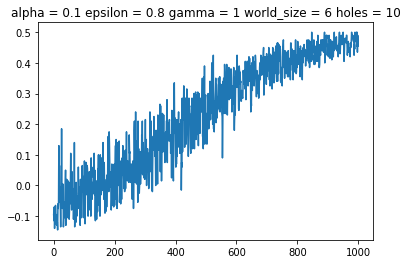

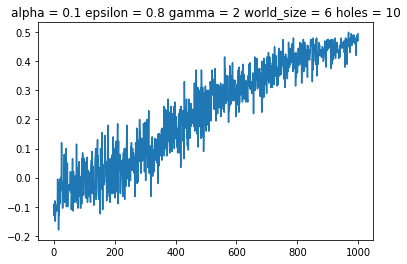

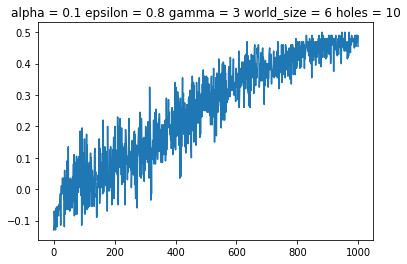

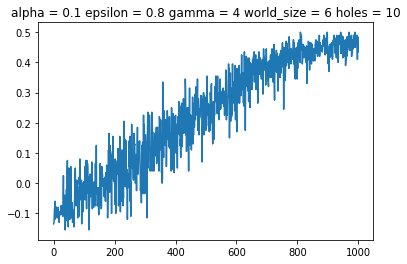

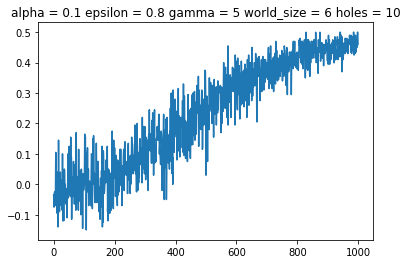

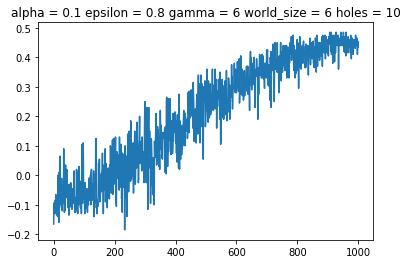

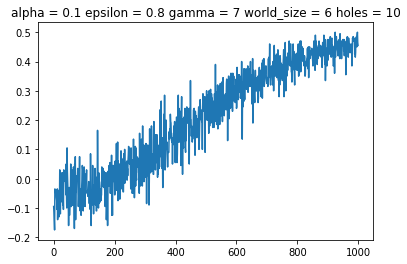

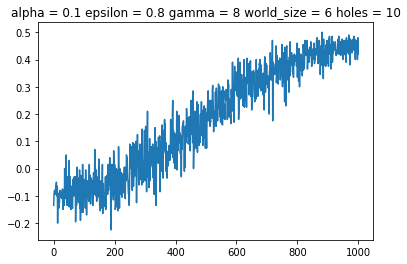

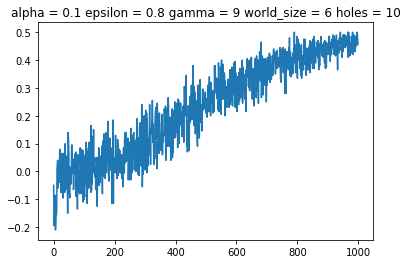

In [ ]:
N_EPISODES = 10**5
AVG_STEP = 10**2
N_HOLES = 10
WORLD_SIZE = 6
EPSILON=0.8
GAMMA=0.9
LR=0.1

for i in range(1,10):
  GAMMA = i/10
  total_reward,agent = frozenWorldSolver(world_size=WORLD_SIZE, nholes=N_HOLES, n_episodes=N_EPISODES, avg_step=AVG_STEP, epsilon=EPSILON, gamma=GAMMA, lr=LR, silent=True)
  plt.plot(np.arange(N_EPISODES//AVG_STEP),total_reward)
  plt.title("alpha = 0.1 epsilon = 0.8 gamma = "+str(i)+" world_size = 6 holes = 10")
  plt.show()

### Varying N_HOLES, rest constant

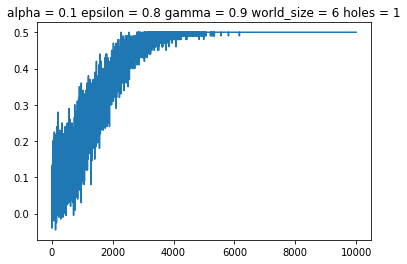

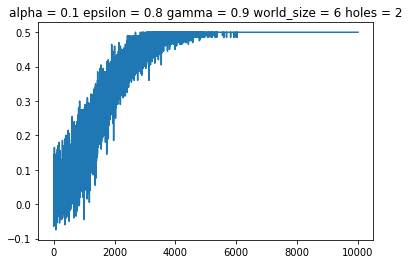

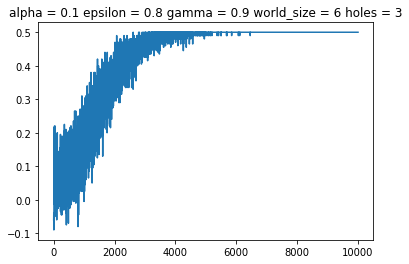

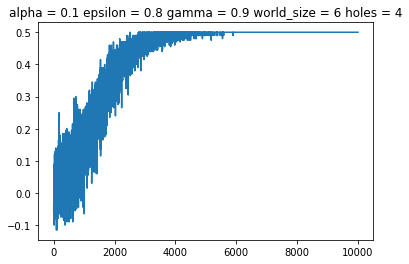

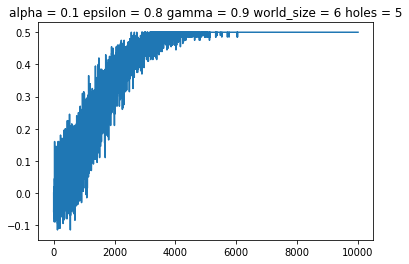

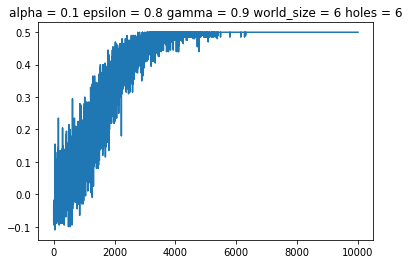

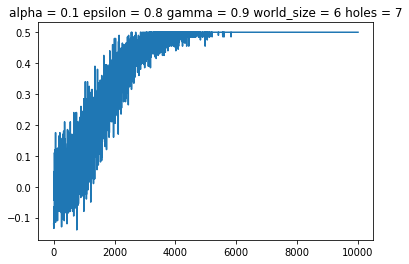

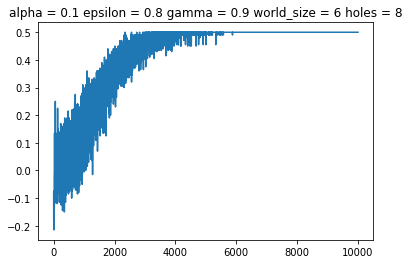

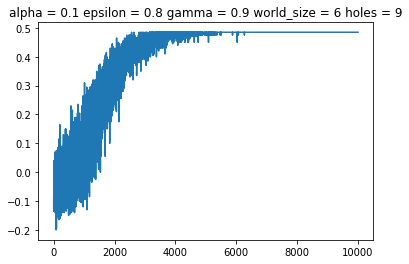

In [ ]:
N_EPISODES = 10**6
AVG_STEP = 10**2
N_HOLES = 10
WORLD_SIZE = 6
EPSILON=0.8
GAMMA=0.9
LR=0.1

for i in range(1,10):
  N_HOLES = i
  total_reward,agent = frozenWorldSolver(world_size=WORLD_SIZE, nholes=N_HOLES, n_episodes=N_EPISODES, avg_step=AVG_STEP, epsilon=EPSILON, gamma=GAMMA, lr=LR, silent=True)
  plt.plot(np.arange(N_EPISODES//AVG_STEP),total_reward)
  plt.title("alpha = 0.1 epsilon = 0.8 gamma = 0.9 world_size = 6 holes = "+str(i))
  plt.show()

### Varying WORLD_SIZE, rest constant

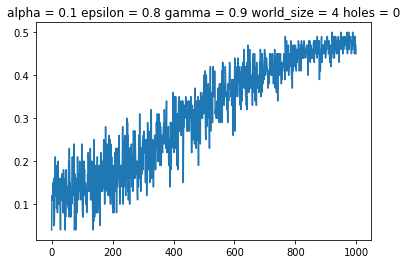

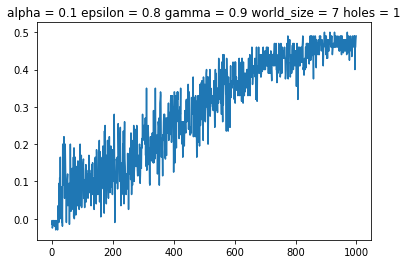

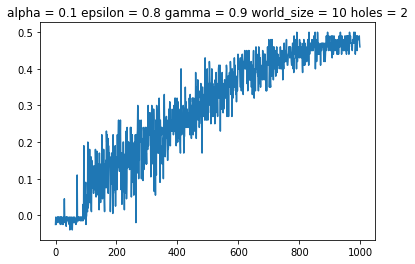

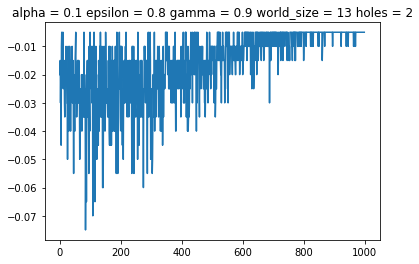

In [ ]:
N_EPISODES = 10**5
AVG_STEP = 10**2
N_HOLES = 10
WORLD_SIZE = 6
EPSILON=0.8
GAMMA=0.9
LR=0.1

for i in range(4,15,3):
  WORLD_SIZE = i
  total_reward,agent = frozenWorldSolver(world_size=WORLD_SIZE, nholes=WORLD_SIZE//5, n_episodes=N_EPISODES, avg_step=AVG_STEP, epsilon=EPSILON, gamma=GAMMA, lr=LR, silent=True)
  plt.plot(np.arange(N_EPISODES//AVG_STEP),total_reward)
  plt.title("alpha = 0.1 epsilon = 0.8 gamma = 0.9 world_size = "+str(WORLD_SIZE)+" holes = "+str(WORLD_SIZE//5))
  plt.show()

### Varying EPSILON, rest constant

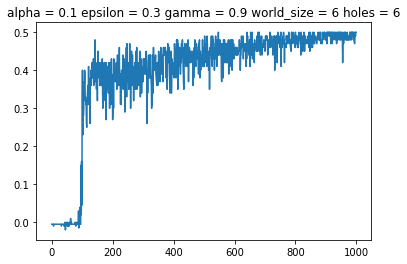

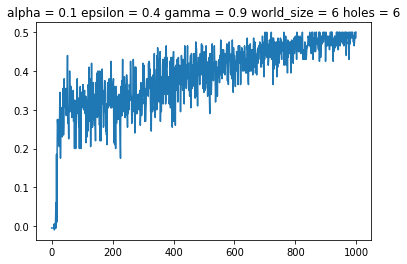

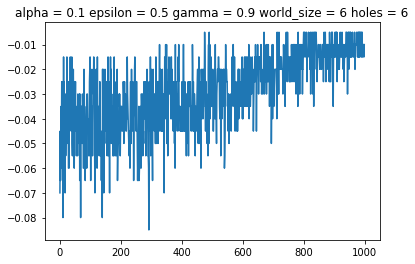

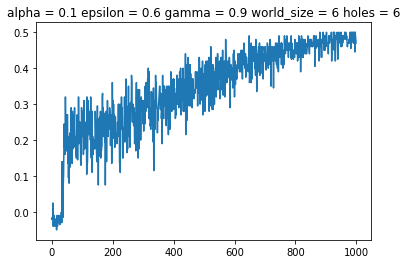

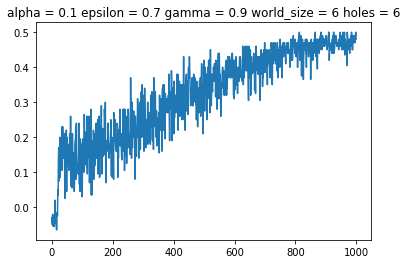

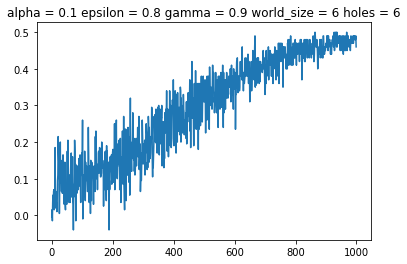

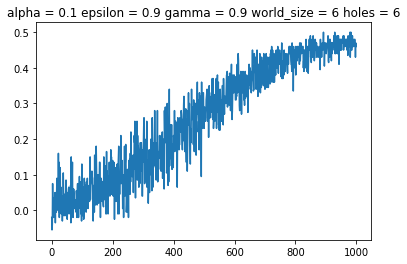

In [ ]:
N_EPISODES = 10**5
AVG_STEP = 10**2
N_HOLES = 6
WORLD_SIZE = 6
EPSILON=0.8
GAMMA=0.9
LR=0.1

for i in range(3,10):
  EPSILON = i/10
  total_reward,agent = frozenWorldSolver(world_size=WORLD_SIZE, nholes=WORLD_SIZE//5, n_episodes=N_EPISODES, avg_step=AVG_STEP, epsilon=EPSILON, gamma=GAMMA, lr=LR, silent=True)
  plt.plot(np.arange(N_EPISODES//AVG_STEP),total_reward)
  plt.title("alpha = 0.1 epsilon = "+str(EPSILON)+" gamma = 0.9 world_size = 6 holes = 6")
  plt.show()

# **Q3. (20 points)** 

The Rulkov map is a simple dynamical systems model of neuronal action potentials. \\
The model is a coupling of a fast and a slow dynamical system in the following form \\
$𝑥_(𝑛+1) = 𝑓(𝑥_𝑛, 𝑦_𝑛)$ \\
$𝑦_(𝑛+1) = 𝑦_𝑛 − 𝜇 (𝑥_𝑛 + 1) + 𝜇𝜎$ \\
where $f()$ is a discontinuous function of the form \\
$𝑓(𝑥, 𝑦) = 𝛼/(1 − 𝑥)+ 𝑦, 𝑥 ≤ 0 \\
𝑓(𝑥, 𝑦) = 𝛼 + 𝑦, 0 < 𝑥 < 𝛼 + 𝑦 \\
𝑓(𝑥, 𝑦) = −1, 𝑥 ≥ 𝛼 + 𝑦$ \\
For some specific parameter choices, this system can reproduce the broad outlines of neuronal \\
action potentials, viz. bursts of spikes, tonic spiking and periods of silence. I would like you to \\
reproduce all three modes of behavior using this model. Hint: read the original paper for clues to \\
appropriate parameter values. \\
https://journals.aps.org/pre/abstract/10.1103/PhysRevE.65.041922 \\
I would also like you to empirically demonstrated ranges of parameter values that govern these
three different regimes of activity for the neuron model.

In [ ]:
def f(x,y,alpha=4):
  if x <= 0:
    return alpha/(1-x)+y
  elif x < alpha + y:
    return alpha + y
  else:
    return -1

In [ ]:
def rulkovMap(N=10**3, beta=0, sigma=1,mu=0.4,alpha=4):
  X = np.zeros(N)
  Y = np.zeros(N)
  for i in range(N-1):
    X[i+1] = f(X[i], Y[i] + beta,alpha=alpha)
    Y[i+1] = Y[i] - mu*(X[i]+1) + mu*sigma
  return X,Y

### Bursting Spikes

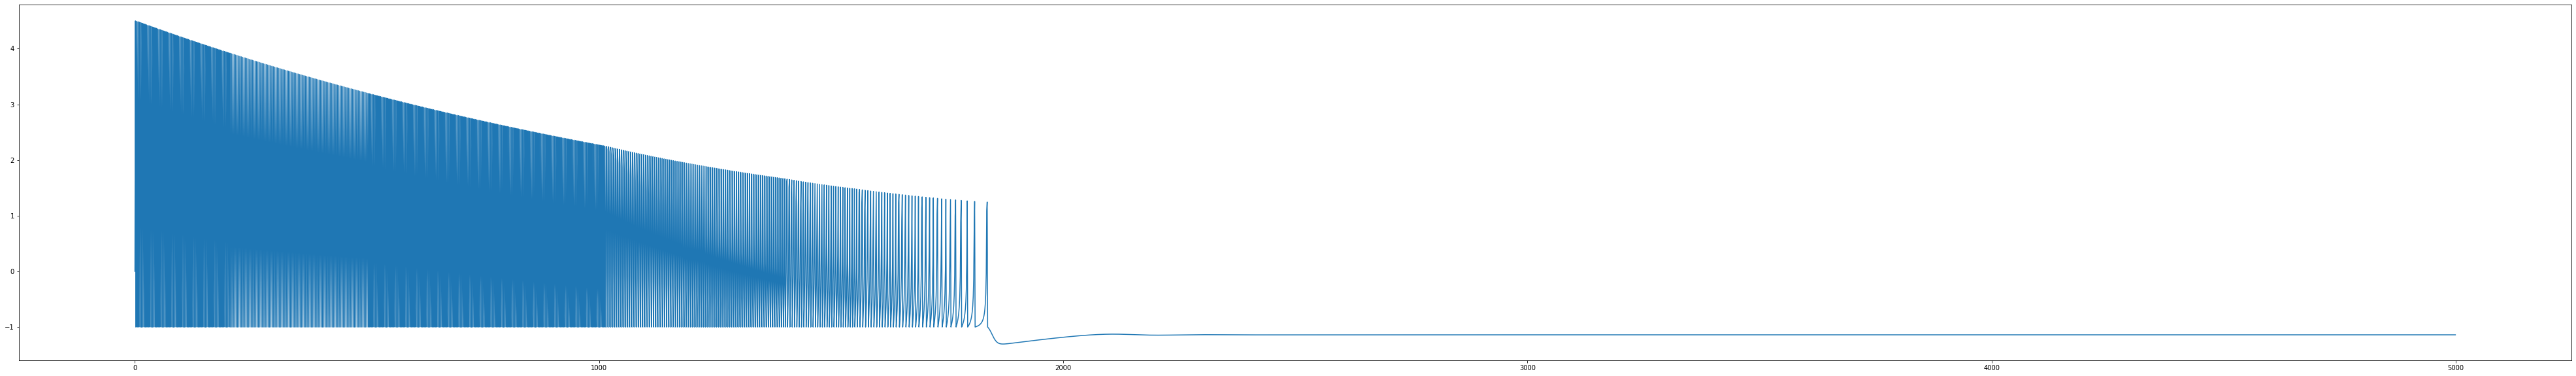

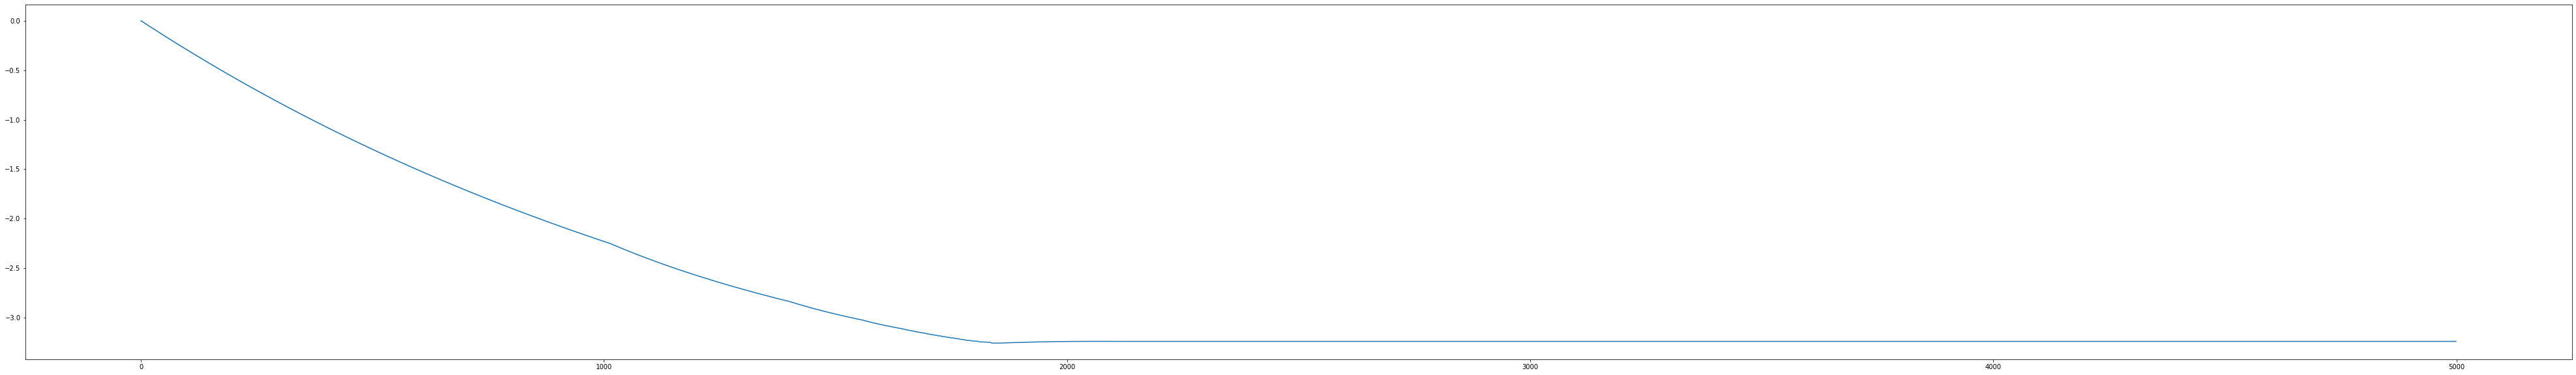

In [ ]:
N=5*10**3
beta=0
sigma=-0.14
mu=0.001
alpha=4.5
X,Y=rulkovMap(N=N, beta=beta, sigma=sigma, mu=mu, alpha=alpha)
plt.figure(figsize=(70, 10)) 
plt.plot(np.arange(N),X)
plt.figure(figsize=(70, 10)) 
plt.plot(np.arange(N),Y)

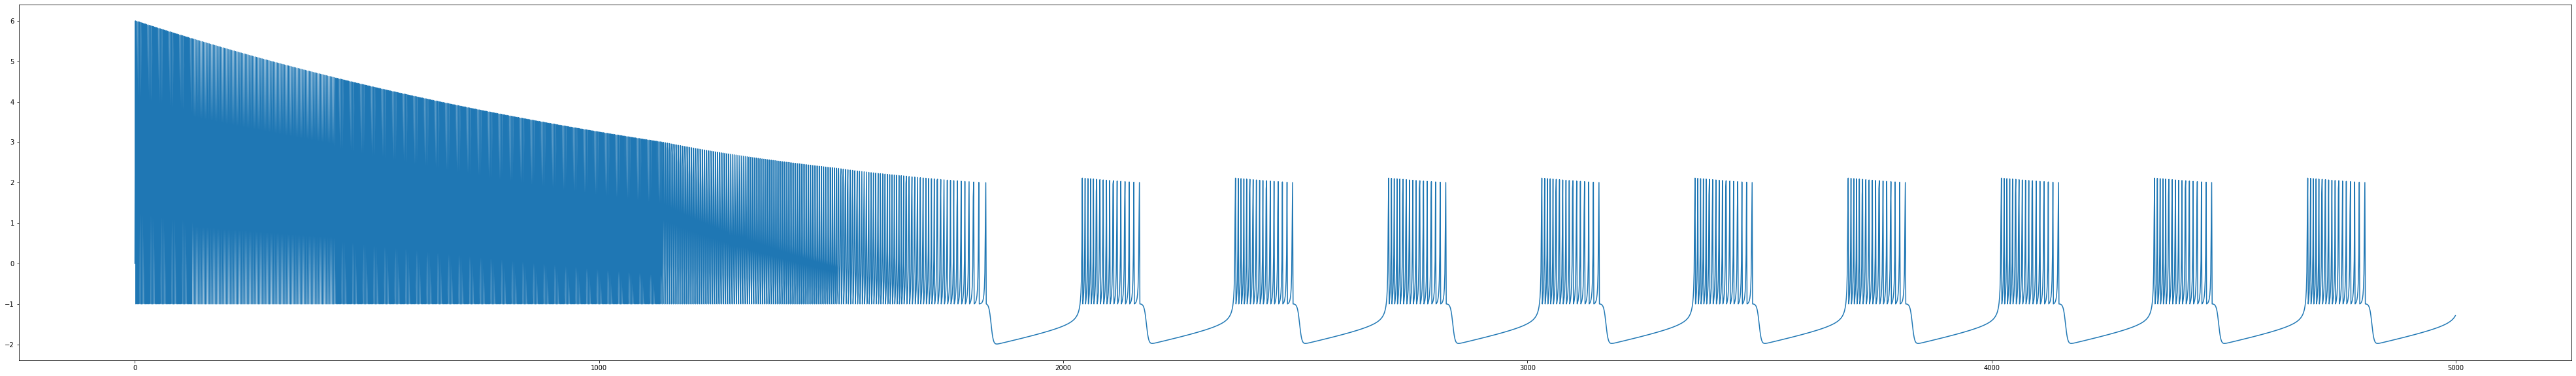

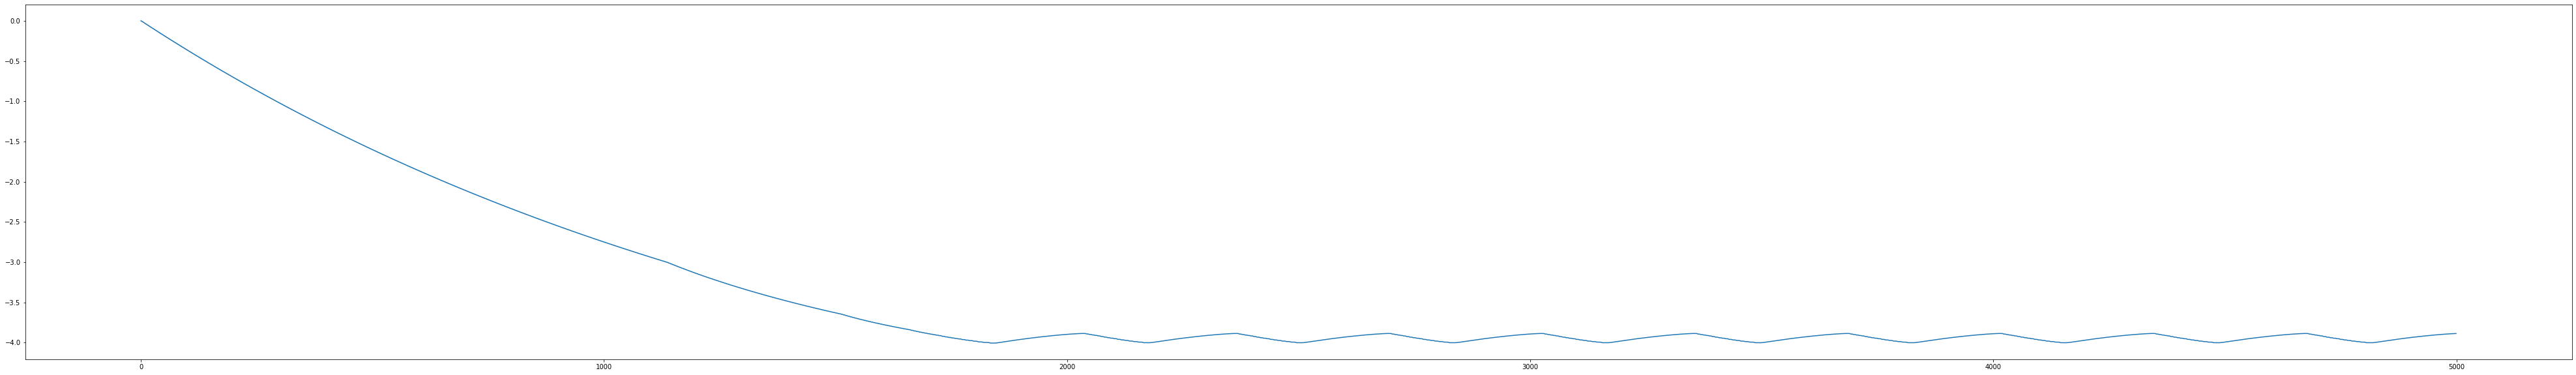

In [ ]:
N=5*10**3
beta=0
sigma=-0.1
mu=0.001
alpha=6
X,Y=rulkovMap(N=N, beta=beta, sigma=sigma, mu=mu, alpha=alpha)
plt.figure(figsize=(70, 10)) 
plt.plot(np.arange(N),X)
plt.figure(figsize=(70, 10)) 
plt.plot(np.arange(N),Y)

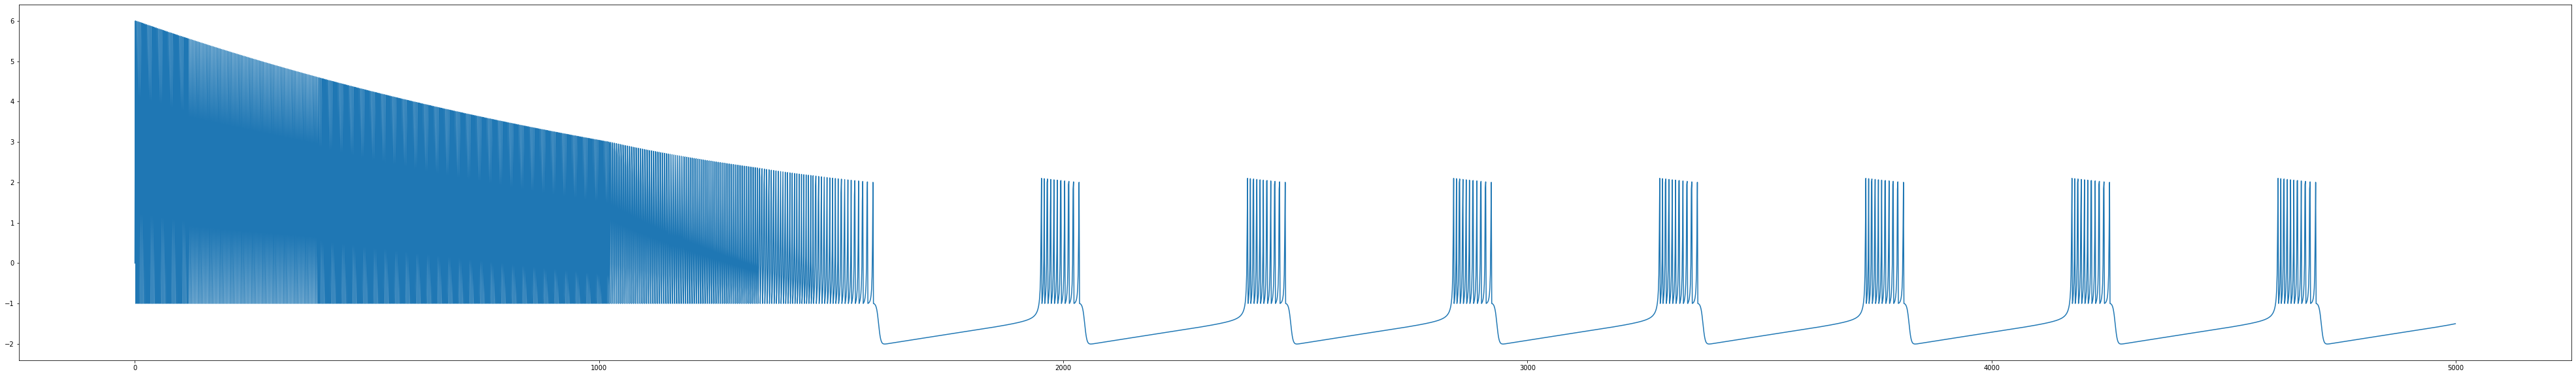

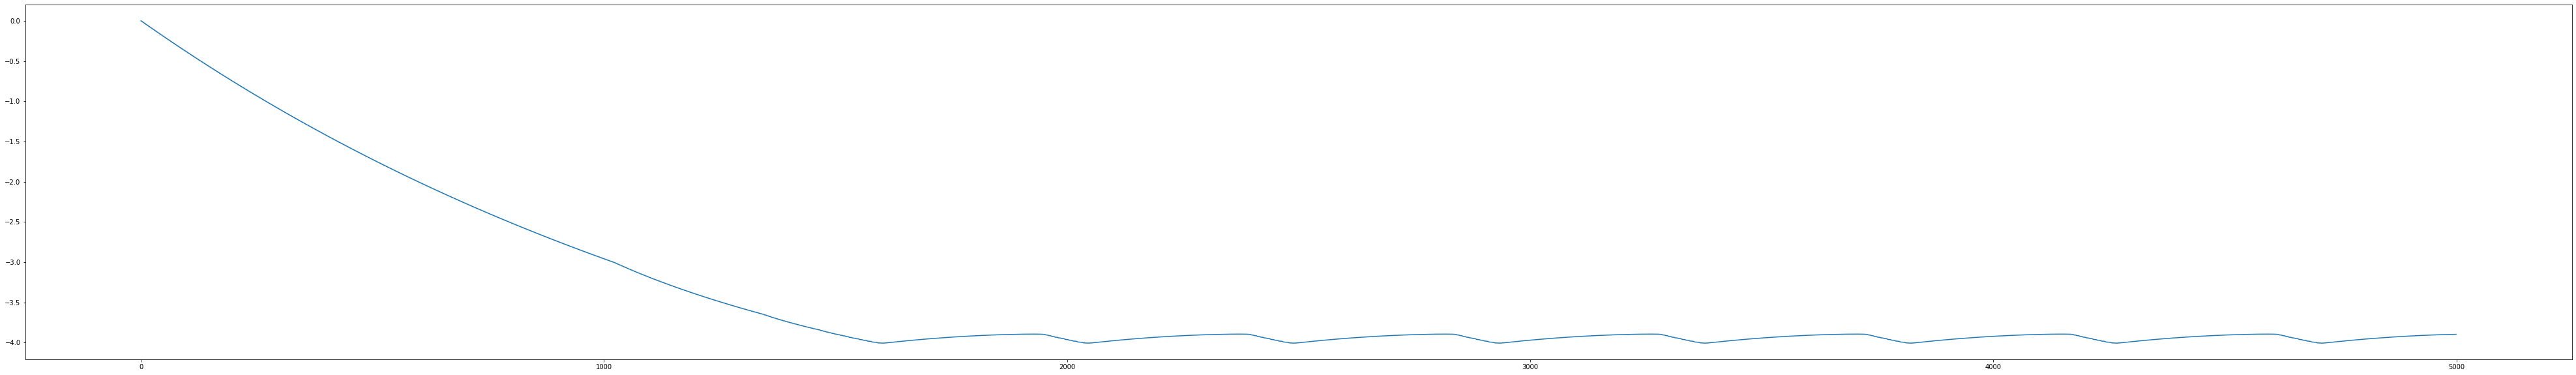

In [ ]:
N=5*10**3
beta=0
sigma=-0.386
mu=0.001
alpha=6
X,Y=rulkovMap(N=N, beta=beta, sigma=sigma, mu=mu, alpha=alpha)
plt.figure(figsize=(70, 10)) 
plt.plot(np.arange(N),X)
plt.figure(figsize=(70, 10)) 
plt.plot(np.arange(N),Y)

### Silence

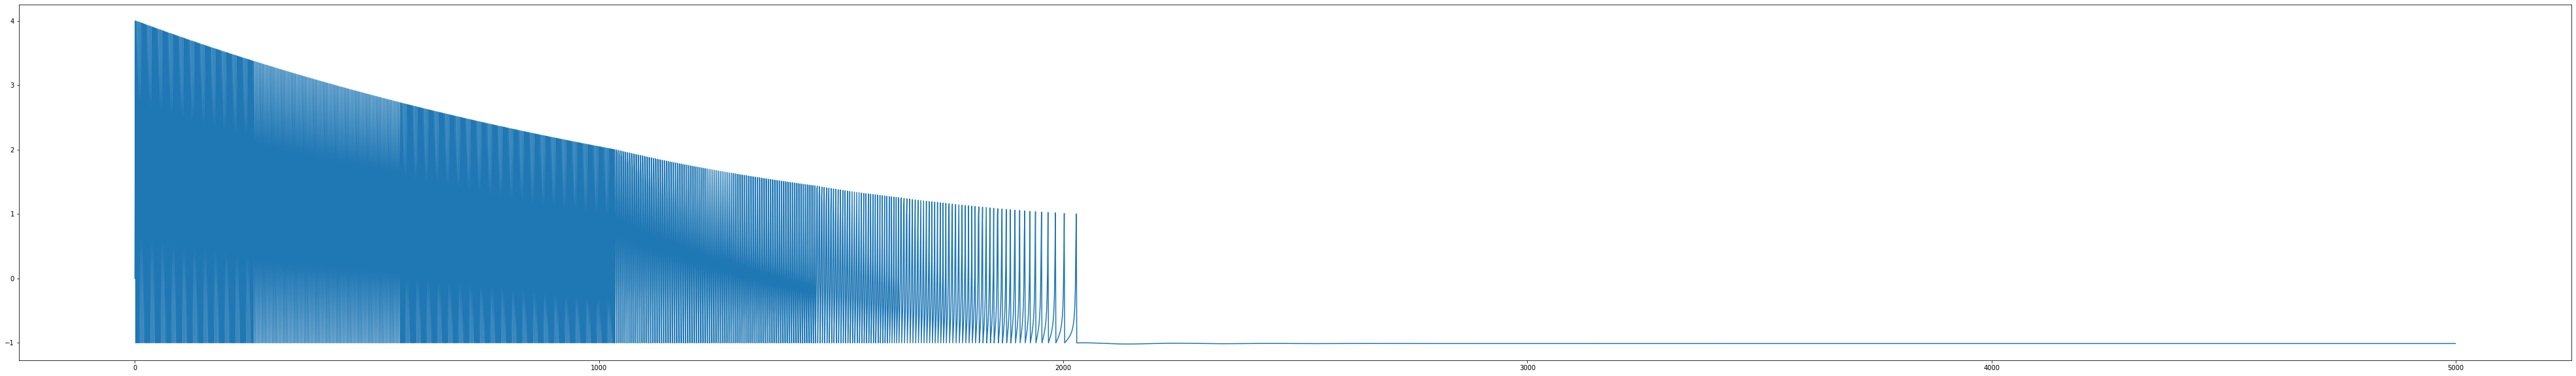

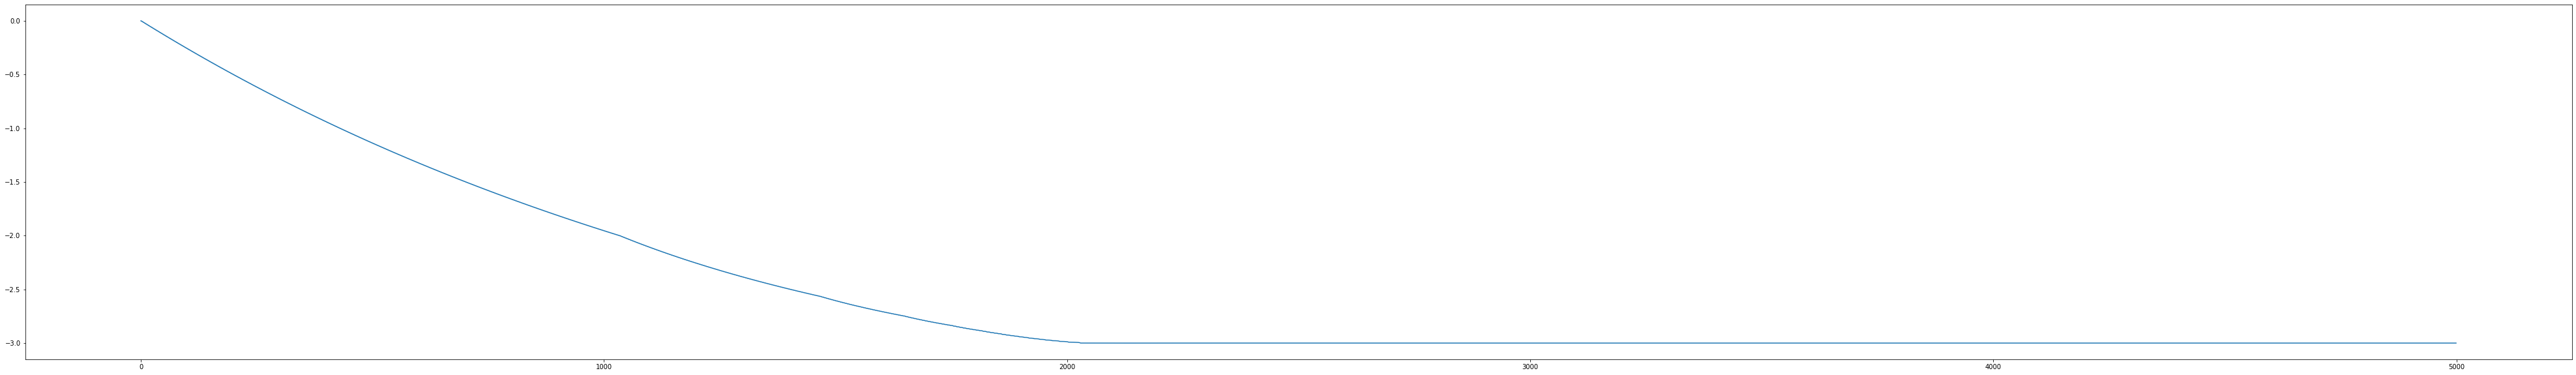

In [ ]:
N=5*10**3
beta=0
sigma=-0.01
mu=0.001
alpha=4
X,Y=rulkovMap(N=N, beta=beta, sigma=sigma, mu=mu, alpha=alpha)
plt.figure(figsize=(70, 10)) 
plt.plot(np.arange(N),X)
plt.figure(figsize=(70, 10)) 
plt.plot(np.arange(N),Y)

### Tonic Spikes

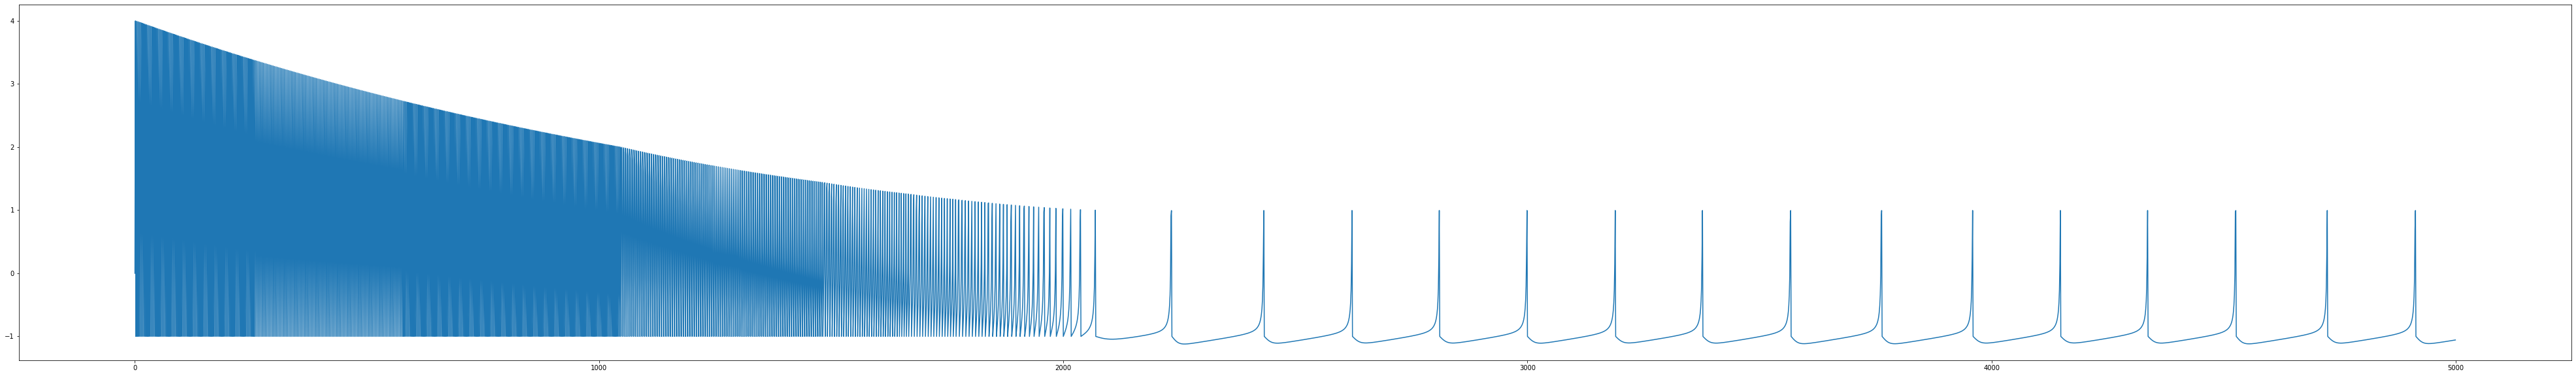

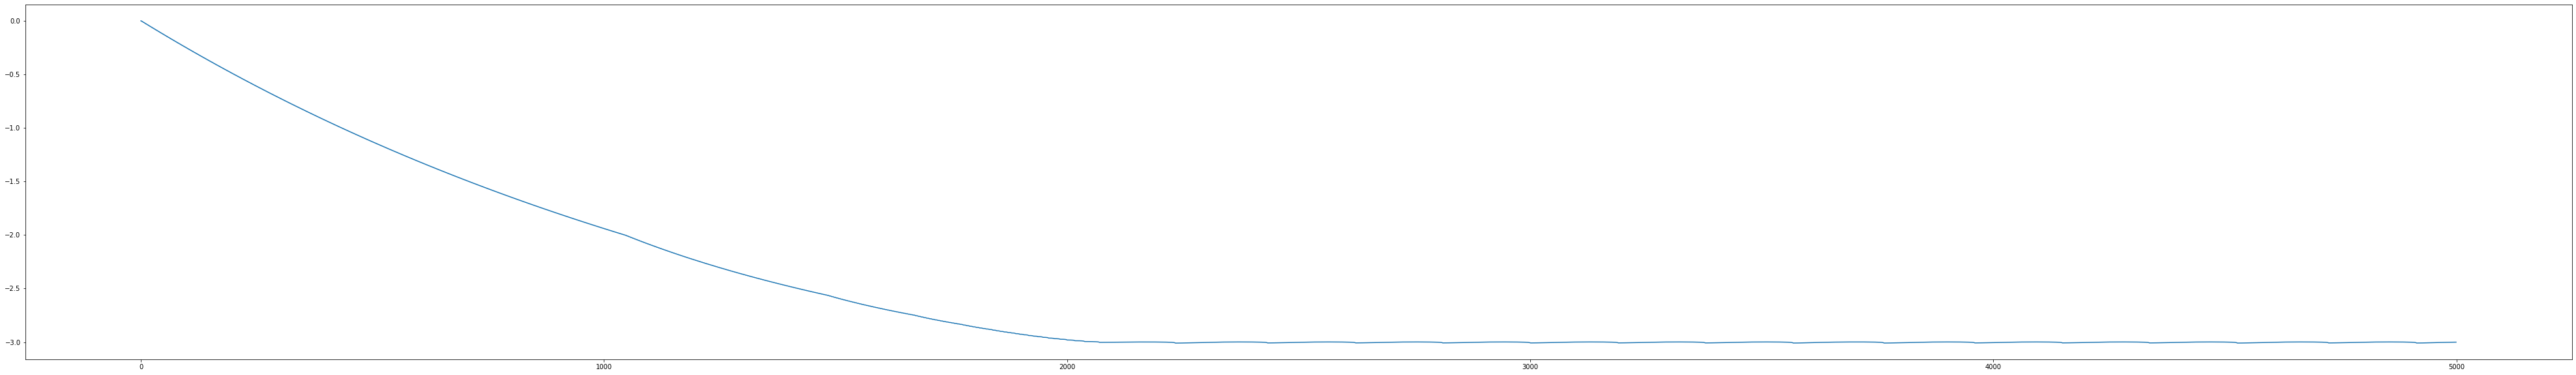

In [ ]:
N=5*10**3
beta=0
sigma=0.01
mu=0.001
alpha=4
X,Y=rulkovMap(N=N, beta=beta, sigma=sigma, mu=mu, alpha=alpha)
plt.figure(figsize=(70, 10)) 
plt.plot(np.arange(N),X)
plt.figure(figsize=(70, 10)) 
plt.plot(np.arange(N),Y)

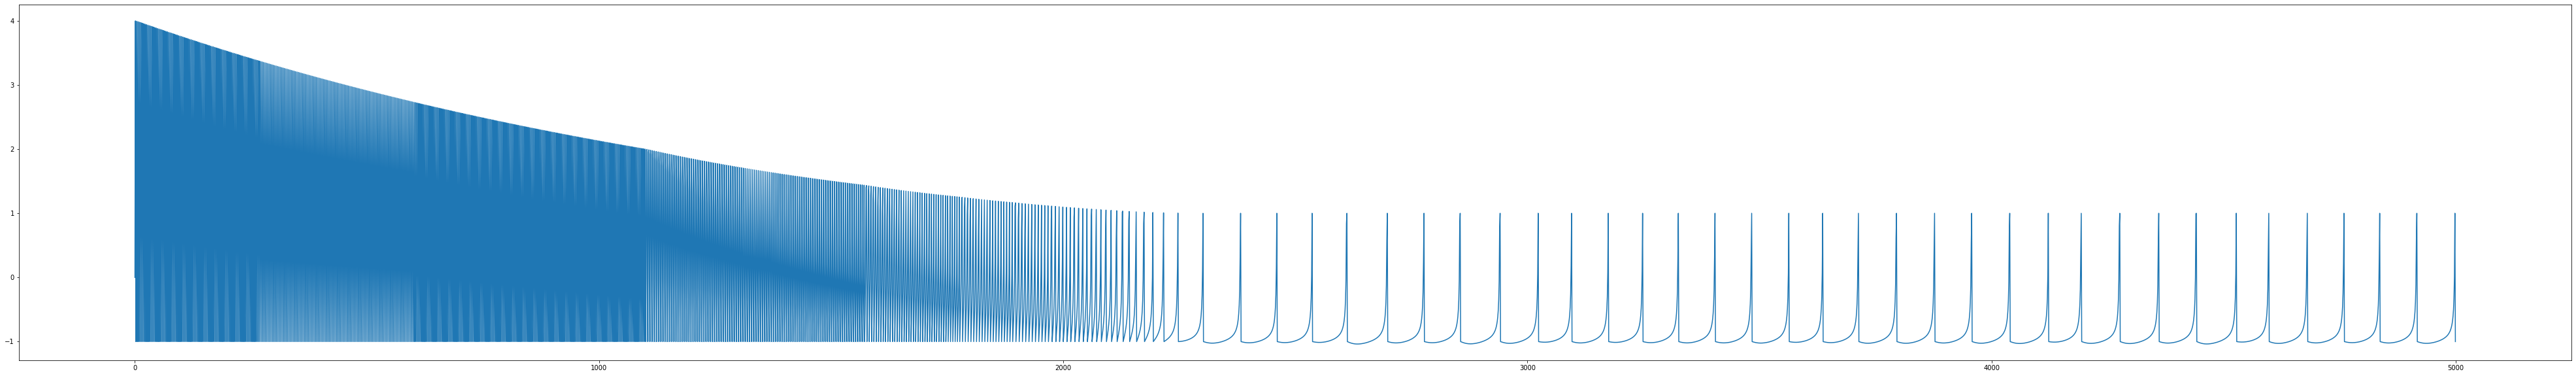

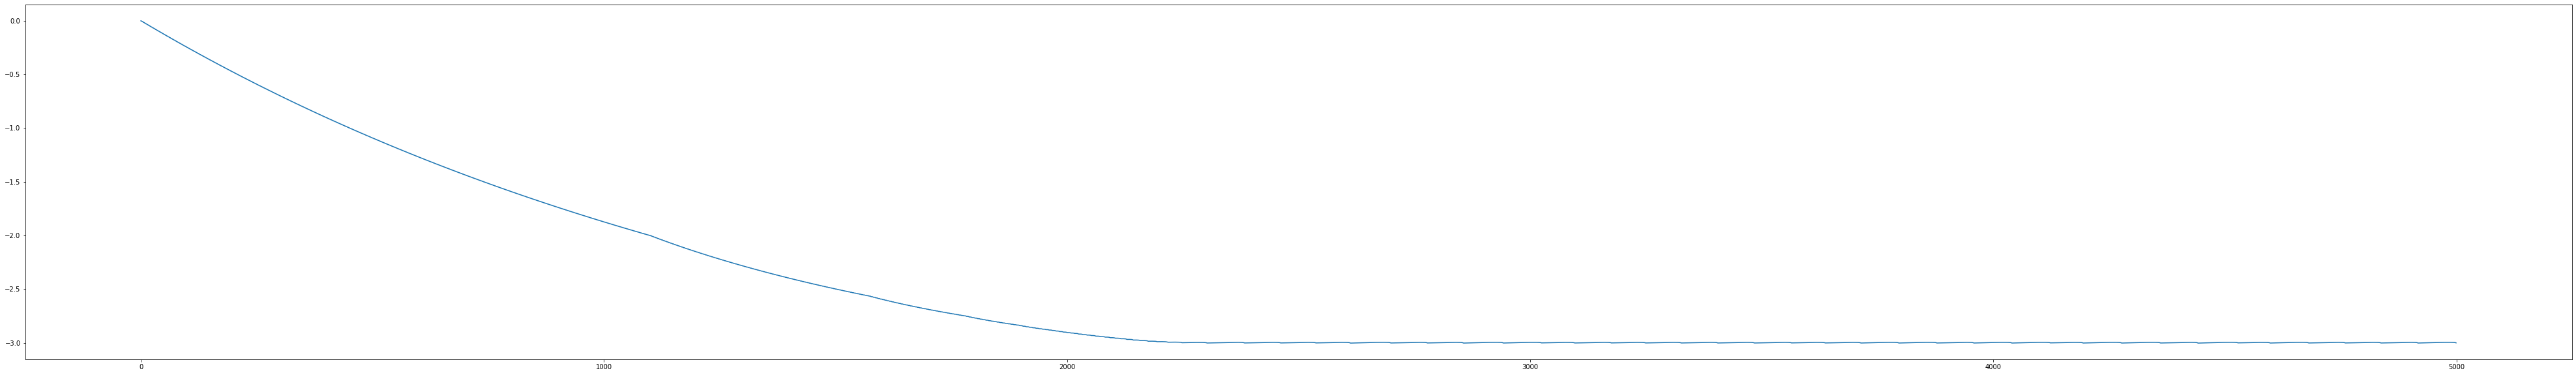

In [ ]:
N=5*10**3
beta=0
sigma=0.1
mu=0.001
alpha=4
X,Y=rulkovMap(N=N, beta=beta, sigma=sigma, mu=mu, alpha=alpha)
plt.figure(figsize=(70, 10)) 
plt.plot(np.arange(N),X)
plt.figure(figsize=(70, 10)) 
plt.plot(np.arange(N),Y)

# Acknowledgement:

I am thankful to my peer Arka in this course who helped me in debugging some of the graphing code by sharing their results and discussing strategies for parameter tuning.